In [15]:
# !nim c -d:release --opt:speed --hints:off ../src/signal_first.nim
# !../src/signal_first

!nim c -d:release --opt:speed --hints:off ../src/signal_first_update.nim
!../src/signal_first_update

Wallclock time elapsed: 0.42008376121521


In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True})

In [11]:
with open('signal_first.json') as f:
    results = np.array(json.load(f)) > 0.5

In [12]:
print(np.sum(results[:,0] != results[:,1]))
print(np.sum(results[:,2] != results[:,3]))

1000
1000


In [13]:
print(np.sum(results[:,0] != results[:,2]))

471


In [2]:
with open('signal_first_update.json') as f:
    results_raw = np.array(json.load(f))
    results = results_raw > 0.5

In [3]:
print(np.sum((results[:,1] != results[:,2]) & (results[:,3] != results[:,4])))

994


In [4]:
print(np.sum(results[:,1] != results[:,3]))

473


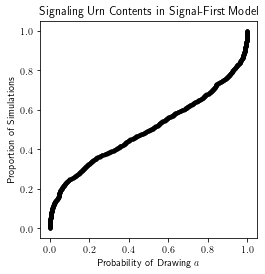

In [9]:
plt.plot(np.sort(results_raw[:,0]), np.arange(1, 1001) / 1000, 'k.')
plt.axis('square')
plt.ylabel('Proportion of Simulations')
plt.xlabel('Probability of Drawing $a$')
plt.title('Signaling Urn Contents in Signal-First Model')
plt.savefig('signaling_urn_contents.pdf')
plt.show()

In [9]:
def calculate_accuracy(values):
    return values[0] * (values[1]*(1 - values[2]) + (1-values[1])*values[2]) +\
        (1-values[0]) * (values[3]*(1-values[4]) + (1-values[3])*values[4])

In [18]:
accuracies = np.array(list(map(calculate_accuracy, results_raw)))
accuracies

array([0.99959922, 0.99249699, 0.99919632, 0.99940236, 0.99919652,
       0.99858844, 0.99920058, 0.99939759, 0.99839995, 0.99761687,
       0.99955416, 0.99939834, 0.99959876, 0.99891607, 0.9981766 ,
       0.99899541, 0.99940536, 0.99940512, 0.99940046, 0.99960029,
       0.99939727, 0.99779923, 0.99960909, 0.99879381, 0.99939809,
       0.99860659, 0.99960453, 0.99899603, 0.99919655, 0.99899517,
       0.99959977, 0.99919652, 0.99820966, 0.99959948, 0.99940599,
       0.99950961, 0.99919609, 0.99960235, 0.99959891, 0.98607247,
       0.99601276, 0.99919564, 0.99696104, 0.99959875, 0.99639811,
       0.99960035, 0.99959861, 0.99798996, 0.99939771, 0.99959896,
       0.99959914, 0.99959916, 0.99798484, 0.99879428, 0.99860148,
       0.99959865, 0.99959904, 0.99879257, 0.99696274, 0.99959913,
       0.9995988 , 0.99818201, 0.9995989 , 0.99470717, 0.99959906,
       0.99695773, 0.99778835, 0.99735566, 0.99919802, 0.99858714,
       0.99798117, 0.9994027 , 0.99919687, 0.99275255, 0.99879

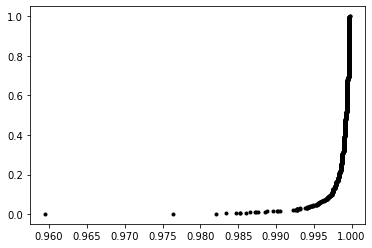

In [20]:
plt.plot(np.sort(accuracies), np.arange(1, 1001) / 1000, 'k.')
# plt.axis('square')
plt.show()

In [21]:
np.mean(accuracies)

0.9986021659841087

In [22]:
np.min(accuracies)

0.9594981989565784